In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train, Test, Validation


In [ ]:
IMG_SIZE = 224
seed = 42

NUM_CLASSES = 4
BATCH_SIZE = 32
EPOCHS = 100

CLASSES = ['Bacterial_spot','Early_blight','Late_blight','Leaf_Mold']

In [ ]:
TRAIN_DATADIR = '/content/drive/My Drive//DerinOgrenme_Datasets/Hafta_11/train/'
TEST_DATADIR = '/content/drive/My Drive/DerinOgrenme_Datasets/Hafta_11/test/'
VAL_DATADIR = '/content/drive/My Drive/DerinOgrenme_Datasets/Hafta_11/val/'



In [ ]:
import cv2

training_data = []

def creating_training_data():
  for category in CLASSES:
    path = os.path.join(TRAIN_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
creating_training_data()
print(len(training_data))

2091


In [ ]:
testing_data = []

def creating_testing_data():
  for category in CLASSES:
    path = os.path.join(TEST_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        testing_data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
creating_testing_data()
print(len(testing_data))

584


In [ ]:
validating_data = []

def creating_validation_data():
  for category in CLASSES:
    path = os.path.join(VAL_DATADIR, category)
    class_num = CLASSES.index(category)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        validating_data.append([new_array, class_num])
      except Exception as e:
        pass

In [ ]:
creating_validation_data()
print(len(validating_data))

231


In [ ]:
X_training_data = []
y_training_data = []

#Ana training seti görüntüler ve görüntünün sınıfı şeklinde ayrıldı
for classes, label in training_data:
  X_training_data.append(classes)
  y_training_data.append(label)

In [ ]:
X_testing_data = []
y_testing_data = []

for classes, label in testing_data:
  X_testing_data.append(classes)
  y_testing_data.append(label)

In [ ]:
X_validation_data = []
y_validation_data = []

for classes, label in validating_data:
  X_validation_data.append(classes)
  y_validation_data.append(label)

In [ ]:
train_x = np.array(X_training_data)
test_x = np.array(X_testing_data)

In [ ]:
train_y = np.array(y_training_data)
test_y = np.array(y_testing_data)

In [ ]:
valid_x = np.array(X_validation_data)
valid_y = np.array(y_validation_data)

In [ ]:
print("X Train Sape: ", train_x.shape)
print("Y Train Sape: ", train_y.shape)
print("X Test Sape: ", test_x.shape)
print("Y Test Sape: ", test_y.shape)
print("X Validation Sape: ", valid_x.shape)
print("Y Validation Sape: ", valid_y.shape)

X Train Sape:  (2091, 224, 224, 3)
Y Train Sape:  (2091,)
X Test Sape:  (584, 224, 224, 3)
Y Test Sape:  (584,)
X Validation Sape:  (231, 224, 224, 3)
Y Validation Sape:  (231,)


In [ ]:
x_train = train_x
y_train = train_y

x_test = test_x
y_test = test_y

x_val = valid_x
y_val = valid_y

In [ ]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", x_val.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (2091, 224, 224, 3)
y_train shape: (2091,)
X_test shape: (584, 224, 224, 3)
y_test shape: (584,)
X_validation shape: (231, 224, 224, 3)
y_validation shape: (231,)


In [ ]:
x_train = x_train.astype('float32')
x_train /= 255
#matris değerleri 0-255 arasında

x_test = x_test.astype('float32')
x_test /= 255

x_val = x_val.astype('float32')
x_val /= 255

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
y_val= tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_val.shape)
print(y_val.shape)

(2091, 224, 224, 3)
(2091, 4)
(584, 224, 224, 3)
(584, 4)
(231, 224, 224, 3)
(231, 4)


# **CNN**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

#First Layer
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
# Conv2D(32, (3, 3) görüntüler içerisinden 32 tane öznitelik çıkartır
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#Second Layer
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#Third Layer
model.add(Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#Fully Connected Layer
model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow import keras

callback_list = [
    #Saving the best model based on validation
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    #EarlyStopping stops training if the validation loss
    #does not improve for a specified number of epochs (patience),
    #preventing overfitting and saving time.
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data=(x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5078 - loss: 1.1925
Epoch 1: val_loss improved from inf to 3.46784, saving model to best_model.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 58s 674ms/step - accuracy: 0.5091 - loss: 1.1899 - val_accuracy: 0.3636 - val_loss: 3.4678
Epoch 2/100
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7419 - loss: 0.6655
Epoch 2: val_loss did not improve from 3.46784
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.7418 - loss: 0.6651 - val_accuracy: 0.2857 - val_loss: 4.6934
Epoch 3/100
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7943 - loss: 0.5374
Epoch 3: val_loss improved from 3.46784 to 2.86348, saving model to best_model.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 413ms/step - accuracy: 0.7945 - loss: 0.5365 - val_accuracy: 0.3983 - val_loss: 2.8635
Epoch 4/100
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8182 - loss: 0.4735
Epoch 4: val_loss did not improve from 2.86348
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - 

<Figure size 640x480 with 0 Axes>

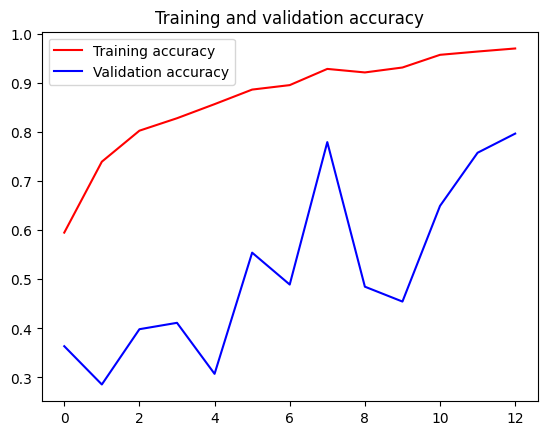

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# CNN Model Evaluation

In [ ]:
train_score = model.evaluate(x_train, y_train)
print("Train Accuracy", train_score[1])

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9760 - loss: 0.0801
Train Accuracy 0.9693926572799683


In [ ]:
val_score = model.evaluate(x_val, y_val)
print("Validation Score", val_score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8371 - loss: 0.5770
Validation Score 0.7965368032455444


In [ ]:
test_score = model.evaluate(x_test, y_test)
print("Test Accuracy", test_score[1])

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.8071 - loss: 0.6526
Test Accuracy 0.7791095972061157


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_test_classes, y_pred_classes)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


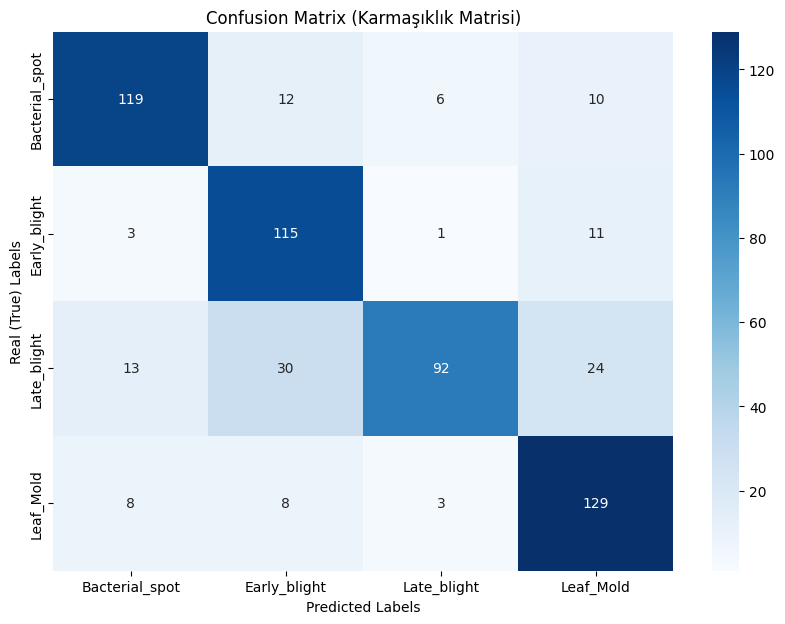

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Predicted Labels")
plt.ylabel("Real (True) Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test_classes, y_pred_classes, target_names=CLASSES)
print(report)

                precision    recall  f1-score   support

Bacterial_spot       0.83      0.81      0.82       147
  Early_blight       0.70      0.88      0.78       130
   Late_blight       0.90      0.58      0.70       159
     Leaf_Mold       0.74      0.87      0.80       148

      accuracy                           0.78       584
     macro avg       0.79      0.79      0.78       584
  weighted avg       0.80      0.78      0.78       584



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


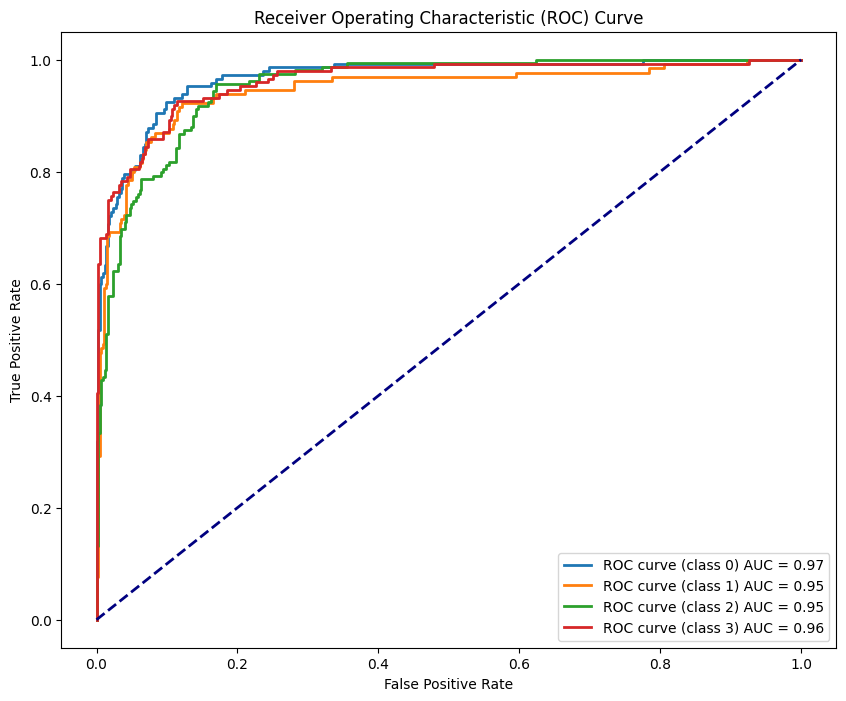

Mean AUC: 0.9572


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Gerçek etiketler (sınıf sayısını belirtmek için 4 sınıf var)
y_test_classes = np.argmax(y_test, axis=1)  # Gerçek sınıflar (etiketler)
y_pred = model.predict(x_test)
y_pred_probabilities = y_pred  # Olasılıkları alıyoruz

# Sınıf etiketlerini ikili hale getiriyoruz (binarize) çünkü ROC için gereklidir
y_test_bin = label_binarize(y_test_classes, classes=[0, 1, 2, 3])  # Sınıflar: 0, 1, 2, 3
n_classes = y_test_bin.shape[1]  # Sınıf sayısı

# ROC eğrisini çizmek için her sınıf için ROC eğrisini hesaplıyoruz
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıflar için ROC eğrisini çiziyoruz
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {0}) AUC = {1:0.2f}'.format(i, roc_auc[i]))

# Diagonal çizgiyi çiziyoruz (rastgele tahminin grafiği)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik etiketlerini ve başlığını ekliyoruz
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Ortalama AUC
mean_auc = np.mean(list(roc_auc.values()))
print(f'Mean AUC: {mean_auc:.4f}')

# RESNET50 Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import models, layers

#Görüntülerin giriş boyutları
input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

model_resnet50V2 = ResNet50V2(weights='imagenet',
                              input_tensor=input_layer,
                              include_top=False)

last_layer = model_resnet50V2.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_resnet50V2 = models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
for layer in model_resnet50V2.layers[:1]:
  layer.trainable = False

# Freeze the first layer of the ResNet50V2 model to retain pre-trained features
# and prevent its weights from being updated during training.

In [ ]:
model_resnet50V2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow import keras

callback_list = [
    #Saving the best model based on validation
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    #EarlyStopping stops training if the validation loss
    #does not improve for a specified number of epochs (patience),
    #preventing overfitting and saving time.
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

In [ ]:
history_resnet50V2 = model_resnet50V2.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.4794 - loss: 2.4739
Epoch 1: val_loss improved from inf to 605335.06250, saving model to best_model.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 120s 960ms/step - accuracy: 0.4796 - loss: 2.4665 - val_accuracy: 0.2511 - val_loss: 605335.0625
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.4042 - loss: 3.4958
Epoch 2: val_loss did not improve from 605335.06250
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - accuracy: 0.4044 - loss: 3.4959 - val_accuracy: 0.2684 - val_loss: 49301452.0000
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.4310 - loss: 3.9827
Epoch 3: val_loss improved from 605335.06250 to 262941.09375, saving model to best_model.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - accuracy: 0.4312 - loss: 3.9816 - val_accuracy: 0.2727 - val_loss: 262941.0938
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.4987 - loss: 3.4599
Epoch 4: val_loss improved from 262941.09375 to

In [ ]:
train_resnet50V2_score = model_resnet50V2.evaluate(x_train, y_train)
print("RESNET50V2 Train Accuracy: ", train_resnet50V2_score[1])

test_resnet50V2_score = model_resnet50V2.evaluate(x_test, y_test)
print("\nRESNET50V2 Test Accuracy: ", test_resnet50V2_score[1])

val_resnet50V2_score = model_resnet50V2.evaluate(x_val, y_val)
print("\nRESNET50V2 Validation Accuracy: ", val_resnet50V2_score[1])

66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.3699 - loss: 165.1282
RESNET50V2 Train Accuracy:  0.4610234200954437
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.3568 - loss: 202.2625

RESNET50V2 Test Accuracy:  0.4109589159488678
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.3396 - loss: 129.5889

RESNET50V2 Validation Accuracy:  0.411255419254303


# EfficientNet B0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import models, layers
from tensorflow.keras.layers import  Flatten, Dense

input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

model_efficientNetB0 = EfficientNetB0(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False
                                      )

last_layer = model_efficientNetB0.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_efficientNetB0 = models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
for layer in model_efficientNetB0.layers[:1]:
  layer.trainable = False

In [ ]:
model_efficientNetB0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_efficientNetB0 = model_efficientNetB0.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    epochs = EPOCHS
                    )


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.6468 - loss: 1.4498 - val_accuracy: 0.2554 - val_loss: 1.9880
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.9048 - loss: 0.4344 - val_accuracy: 0.2727 - val_loss: 4.9381
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9436 - loss: 0.2213 - val_accuracy: 0.2727 - val_loss: 7.3640
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.9345 - loss: 0.2839 - val_accuracy: 0.2554 - val_loss: 4.1625
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9605 - loss: 0.2139 - val_accuracy: 0.2727 - val_loss: 53.1134
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.9097 - loss: 0.7408 - val_accuracy: 0.2814 - val_loss: 9.1741
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9482 - loss: 0.2372 - val_accuracy: 0.3030 - val_loss: 4.1614
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9516 - loss: 0.2654 - val

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model_efficientNetB0.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_val.argmax(axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Formatlı şekilde yazdırma
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Accuracy: 0.8831
Precision: 0.8896
Recall: 0.8831
F1 Score: 0.8843


# EfficientNetB1-B7

In [ ]:
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras import models, layers
from tensorflow.keras.layers import  Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = ["EfficientNetB1", "EfficientNetB2", "EfficientNetB3", "EfficientNetB4", "EfficientNetB5", "EfficientNetB6", "EfficientNetB7"]

input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

def create_model(model_name):
  model = model_name(weights='imagenet',
                      input_tensor=input_layer,
                      include_top=False
                      )

  last_layer = model.output
  flatten = layers.Flatten()(last_layer)
  output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)
  model =  models.Model(inputs=input_layer, outputs=output_layer)
  return model

model_efficientNetB1 = create_model(EfficientNetB1)
model_efficientNetB2 = create_model(EfficientNetB2)
model_efficientNetB3 = create_model(EfficientNetB3)
model_efficientNetB4 = create_model(EfficientNetB4)
model_efficientNetB5 = create_model(EfficientNetB5)
model_efficientNetB6 = create_model(EfficientNetB6)
model_efficientNetB7 = create_model(EfficientNetB7)

efficientNetB_models = [model_efficientNetB1, model_efficientNetB2, model_efficientNetB3, model_efficientNetB4,
                       model_efficientNetB5, model_efficientNetB6, model_efficientNetB7]

for model in efficientNetB_models:
  model.layers[0].trainable = False
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
def create_history(model_name):
  history = model_name.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,
                        validation_data=(x_val, y_val),
                        epochs=EPOCHS)
  return history

In [ ]:
def get_scores(model_name):

    y_pred = model_name.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    y_true_classes = y_val.argmax(axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

    print("#############################################################")
    print(f"Accuracy For Model {i}: {accuracy:.4f}")
    print(f"Precision For Model {i}: {precision:.4f}")
    print(f"Recall For Model {i}: {recall:.4f}")
    print(f"F1 Score For Model {i}: {f1:.4f}")

In [ ]:
history_efficientNetB1 = create_history(model_efficientNetB1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 978s 14s/step - accuracy: 0.6411 - loss: 1.3687 - val_accuracy: 0.2727 - val_loss: 4.8110
Epoch 2/100
23/66 ━━━━━━━━━━━━━━━━━━━━ 9:29 13s/step - accuracy: 0.8607 - loss: 0.3736

KeyboardInterrupt: 

In [ ]:
get_scores(model_efficientNetB1)

In [ ]:
history_efficientNetB2 = create_history(model_efficientNetB2)

In [ ]:
get_scores(model_efficientNetB2)

In [ ]:
history_efficientNetB3 = create_history(model_efficientNetB3)

In [ ]:
get_scores(model_efficientNetB3)

In [ ]:
history_efficientNetB4 = create_history(model_efficientNetB4)

In [ ]:
get_scores(model_efficientNetB4)

In [ ]:
history_efficientNetB4 = create_history(model_efficientNetB5)

In [ ]:
get_scores(model_efficientNetB5)

In [ ]:
history_efficientNetB4 = create_history(model_efficientNetB6)

In [ ]:
get_scores(model_efficientNetB6)

In [ ]:
history_efficientNetB4 = create_history(model_efficientNetB7)

In [ ]:
get_scores(model_efficientNetB7)